In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv('Student_Performance.csv')

## 1. Exploring

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
df.duplicated().sum()

np.int64(127)

In [7]:
df.drop_duplicates(inplace=True)

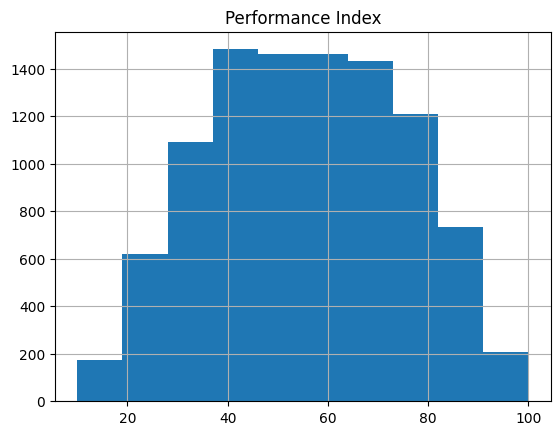

In [8]:
df["Performance Index"].hist(bins=10)
plt.title("Performance Index")
plt.show()

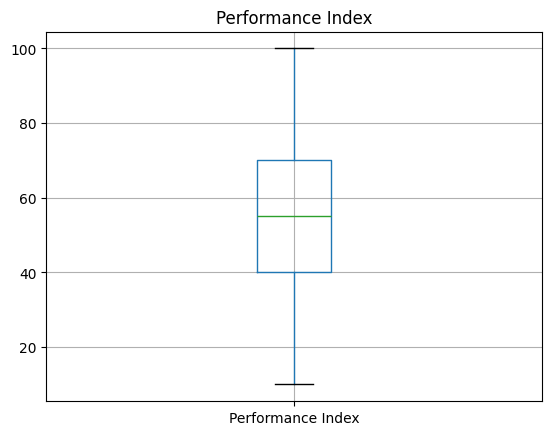

In [9]:
df.boxplot(column="Performance Index")
plt.title("Performance Index")
plt.show()

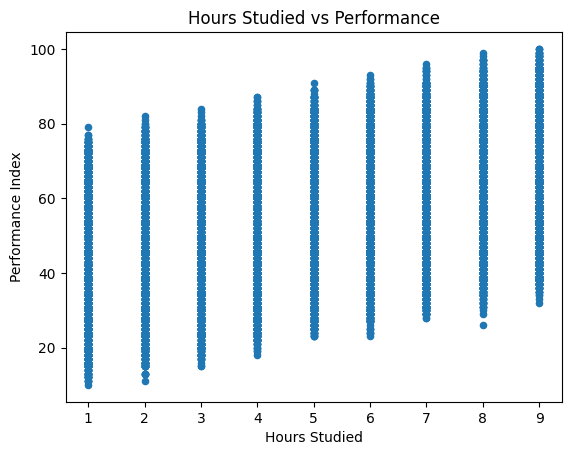

In [10]:
df.plot.scatter(x="Hours Studied", y="Performance Index")
plt.title("Hours Studied vs Performance")
plt.show()


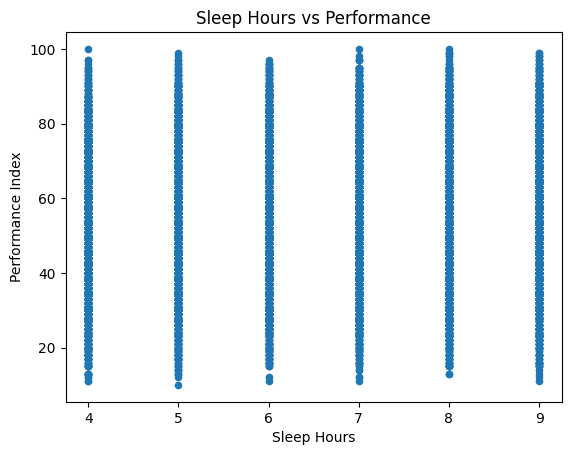

In [11]:
df.plot.scatter(x="Sleep Hours", y="Performance Index")
plt.title("Sleep Hours vs Performance")
plt.show()

In [12]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})


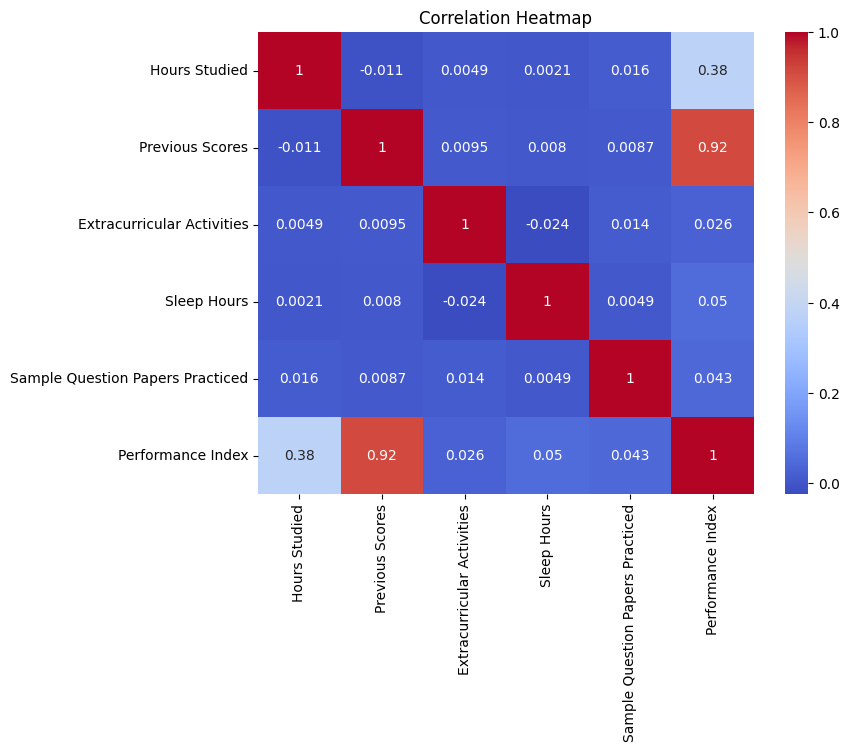

In [13]:
corr = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 2. Data Preprocessing

In [14]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [15]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
model = SGDRegressor(max_iter=1000, tol=1e-3)
model.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [27]:
# model = LinearRegression()
# model.fit(X_train, y_train)

In [28]:
print(f"Coefficients: {model.coef_}")

Coefficients: [22.76301906 59.97498466  0.56626757  2.34250241  1.66222312]


In [29]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 4.31
Root Mean Squared Error (RMSE): 2.08
R-squared (R2): 0.99


In [32]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [33]:
df_results

,Actual,Predicted
6099,47.0,46.475648
106,76.0,80.234168
9265,62.0,61.044864
4707,23.0,22.739549
2155,76.0,74.762646
...,...,...
8732,19.0,18.322222
3112,39.0,40.302936
5297,77.0,77.030010
6116,88.0,86.160727
